## 파일 불러오기 및 경로 설정

In [11]:
import numpy as np
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
csv_dir = "results/csv/"
fig_dir = "results/figure/"
answer_path = csv_dir+"DP/answer.csv"
sns.set_theme()

In [46]:
answer_df = pd.read_csv(answer_path, header=None)
answer_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-59.423677,-57.423871,-54.281314,-51.710126,-57.423871,-54.566995,-49.710294,-45.139267,-54.281314,-49.710294,-40.853916,-29.997666,-51.710126,-45.139267,-29.997666,0.0


In [108]:

MC_dir = csv_dir + "MC/"
MC_fileList = [os.path.join(MC_dir, file) for file in os.listdir(MC_dir) if os.path.isfile(os.path.join(MC_dir, file))]
TD1_dir = csv_dir + "1-step TD/"
TD1_fileList = [os.path.join(TD1_dir, file) for file in os.listdir(TD1_dir) if os.path.isfile(os.path.join(TD1_dir, file))]
TD3_dir = csv_dir + "3-step TD/"
TD3_fileList = [os.path.join(TD3_dir, file) for file in os.listdir(TD3_dir) if os.path.isfile(os.path.join(TD3_dir, file))]
TDn_dir = csv_dir + "n-step TD/"
print(len(MC_fileList), len(TD1_fileList), len(TD3_fileList))

100 100 100


## 차이값 계산 및 데이터 수집

In [202]:
# MC
flag = False
MC_avg_diff_list = []
MC_diff_list = []
MC_list = []

for file in MC_fileList:
    mc_df = pd.read_csv(file, header=None)
    if flag :
        flag = True
        answer_series = pd.Series(answer_df.iloc[0].values, index=mc_df.columns)
    diff_df = mc_df.subtract(answer_series, axis=1).abs()
    row_avg_diff = diff_df.mean(axis=1)
    MC_avg_diff_list.append(row_avg_diff)
    MC_diff_list.append(diff_df)
    MC_list.append(mc_df.iloc[-1])

In [203]:
# 1-step TD
flag = False
TD1_avg_diff_list = []
TD1_diff_list = []
TD1_list = []

for file in TD1_fileList:
    td1_df = pd.read_csv(file, header=None)
    if flag :
        flag = True
        answer_series = pd.Series(answer_df.iloc[0].values, index=td1_df.columns)
    diff_df = td1_df.subtract(answer_series, axis=1).abs()
    row_avg_diff = diff_df.mean(axis=1)
    TD1_avg_diff_list.append(row_avg_diff)
    TD1_diff_list.append(diff_df)
    TD1_list.append(td1_df.iloc[-1])

In [103]:
# 3-step TD
flag = False
TD3_avg_diff_list = []
TD3_diff_list = []
TD3_list = []

for file in TD3_fileList:
    td3_df = pd.read_csv(file, header=None)
    if flag :
        flag = True
        answer_series = pd.Series(answer_df.iloc[0].values, index=td3_df.columns)
    diff_df = td3_df.subtract(answer_series, axis=1).abs()
    row_avg_diff = diff_df.mean(axis=1)
    TD3_avg_diff_list.append(row_avg_diff)
    TD3_diff_list.append(diff_df)
    TD3_list.append(td3_df.iloc[-1])

In [111]:
# n-step TD
td5_df = pd.read_csv(TDn_dir+"5-step TD.csv", header=None)
answer_series = pd.Series(answer_df.iloc[0].values, index=td5_df.columns)
td5_avg_diff = td5_df.subtract(answer_series, axis=1).abs().mean(axis=1)

td10_df = pd.read_csv(TDn_dir+"10-step TD.csv", header=None)
td10_avg_diff = td10_df.subtract(answer_series, axis=1).abs().mean(axis=1)

td30_df = pd.read_csv(TDn_dir+"30-step TD.csv", header=None)
td30_avg_diff = td30_df.subtract(answer_series, axis=1).abs().mean(axis=1)

td100_df = pd.read_csv(TDn_dir+"100-step TD.csv", header=None)
td100_avg_diff = td100_df.subtract(answer_series, axis=1).abs().mean(axis=1)

## 통계

In [153]:
# ver 1. avg row diff
MC_avg_diff_list_df = pd.concat(MC_avg_diff_list, axis=1)
MC_avg = MC_avg_diff_list_df.mean(axis=1).iloc[:10000]
MC_std = MC_avg_diff_list_df.std(axis=1).iloc[:10000]

TD1_avg_diff_list_df = pd.concat(TD1_avg_diff_list, axis=1)
TD1_avg = TD1_avg_diff_list_df.mean(axis=1).iloc[:10000]
TD1_std = TD1_avg_diff_list_df.std(axis=1).iloc[:10000]

TD3_avg_diff_list_df = pd.concat(TD3_avg_diff_list, axis=1)
TD3_avg = TD3_avg_diff_list_df.mean(axis=1).iloc[:10000]
TD3_std = TD3_avg_diff_list_df.std(axis=1).iloc[:10000]

print("MC")
print(MC_avg.tail(), MC_std.tail())
print("\n1-step TD")
print(TD1_avg.tail(), TD1_std.tail())
print("\n3-step TD")
print(TD3_avg.tail(), TD3_std.tail())

MC
9995    2.423749
9996    2.438013
9997    2.444285
9998    2.454532
9999    2.431111
dtype: float64 9995    1.217614
9996    1.280707
9997    1.284418
9998    1.286023
9999    1.280035
dtype: float64

1-step TD
9995    0.836589
9996    0.832920
9997    0.833236
9998    0.835673
9999    0.832619
dtype: float64 9995    0.433543
9996    0.432644
9997    0.434049
9998    0.439177
9999    0.440797
dtype: float64

3-step TD
9995    1.504063
9996    1.508533
9997    1.519424
9998    1.525174
9999    1.535084
dtype: float64 9995    0.802113
9996    0.810521
9997    0.803847
9998    0.802597
9999    0.798720
dtype: float64


In [206]:
# 2. convergence distribution
MC_last_rows_df = pd.DataFrame(MC_list)
TD_last_rows_df = pd.DataFrame(TD1_list)

In [162]:
# 3. state : avg row diff
MC_column_avg = []
MC_column_std = []

for i in range(16):
    column_data = [df.iloc[:, i] for df in MC_diff_list]
    column_data_df = pd.concat(column_data, axis=1)
    MC_column_avg.append(column_data_df.mean(axis=1))
    MC_column_std.append(column_data_df.std(axis=1))
    
    
TD_column_avg = []
TD_column_std = []
for i in range(16):
    column_data = [df.iloc[:, i] for df in TD1_diff_list]
    column_data_df = pd.concat(column_data, axis=1)
    TD_column_avg.append(column_data_df.mean(axis=1))
    TD_column_std.append(column_data_df.std(axis=1))

## 시각화

### MC, 1-step TD, 3-step TD Avg diff

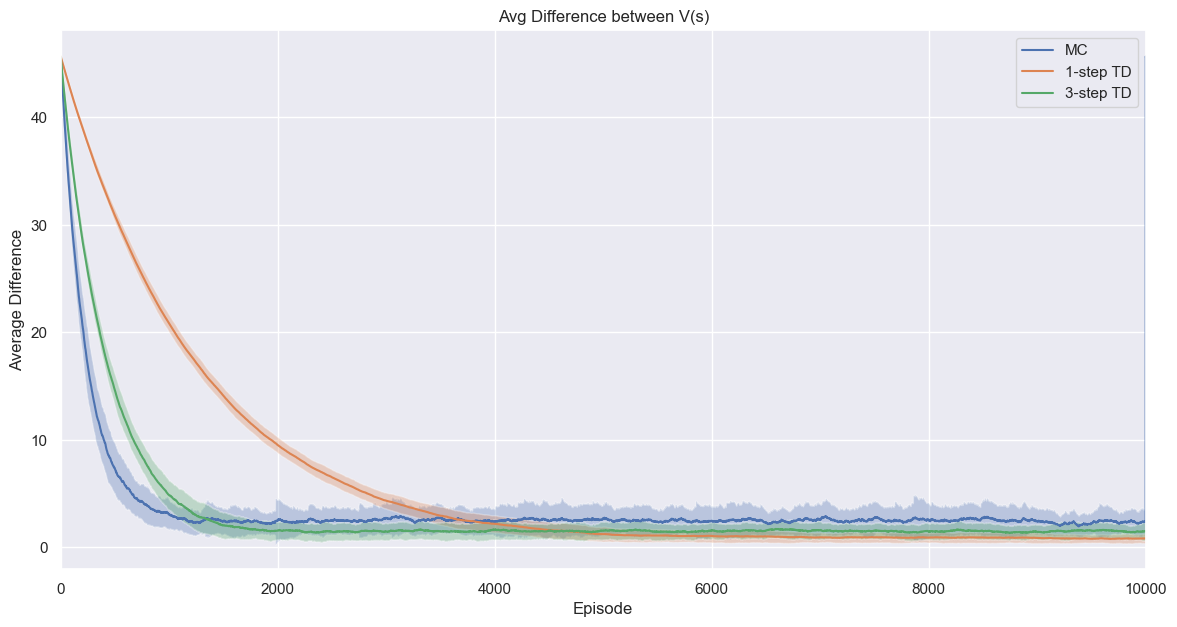

In [107]:
plt.figure(figsize=(14, 7))

sns.lineplot(data=MC_avg, label='MC')
sns.lineplot(data=TD1_avg, label='1-step TD')
sns.lineplot(data=TD3_avg, label='3-step TD')

plt.fill_between(range(len(MC_avg+MC_std)), MC_avg-MC_std, MC_avg+MC_std, alpha=0.3)
plt.fill_between(range(len(TD1_avg+TD1_std)), TD1_avg-TD1_std, TD1_avg+TD1_std, alpha=0.3)
plt.fill_between(range(len(TD3_avg+TD3_std)), TD3_avg-TD3_std, TD3_avg+TD3_std, alpha=0.3)

plt.xlim(0, 10000)
plt.title('Avg Difference between V(s)')
plt.xlabel('Episode')
plt.ylabel('Average Difference')
plt.legend()

plt.show()

### 학습 방법에 따른 최종 수렴된 value 분포의 차이

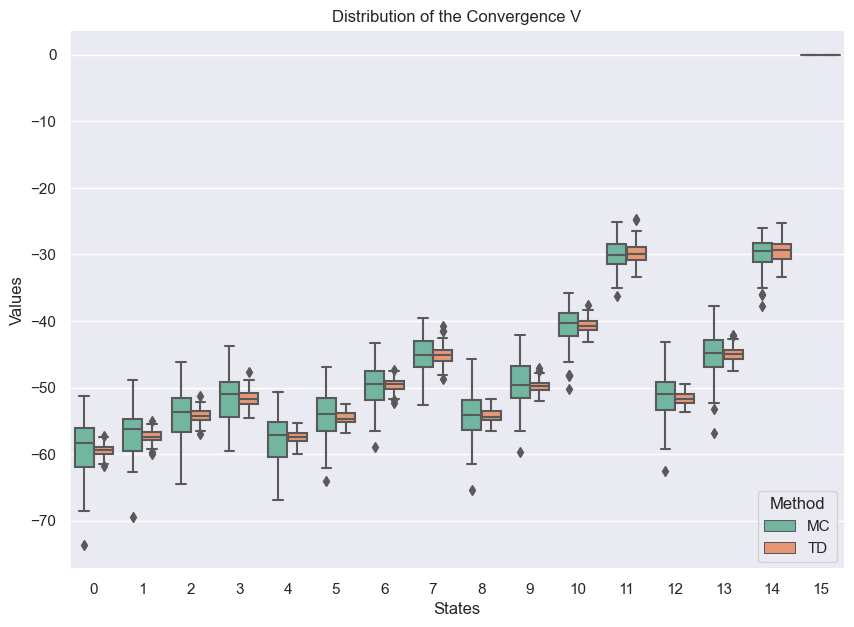

In [227]:
MC_last_rows_df['Type'] = 'MC'
TD_last_rows_df['Type'] = 'TD'
combined_df = pd.concat([MC_last_rows_df, TD_last_rows_df], ignore_index=True)
melted_df = pd.melt(combined_df, id_vars=['Type'], var_name='Column', value_name='Value')

plt.figure(figsize=(10, 7))
sns.boxplot(x='Column', y='Value', hue='Type', data=melted_df, palette='Set2')

plt.title('Distribution of the Convergence V')
plt.xlabel('States')
plt.ylabel('Values')
plt.legend(title='Method')

plt.show()

### state 위치에 따른 V(s)와의 Avg diff

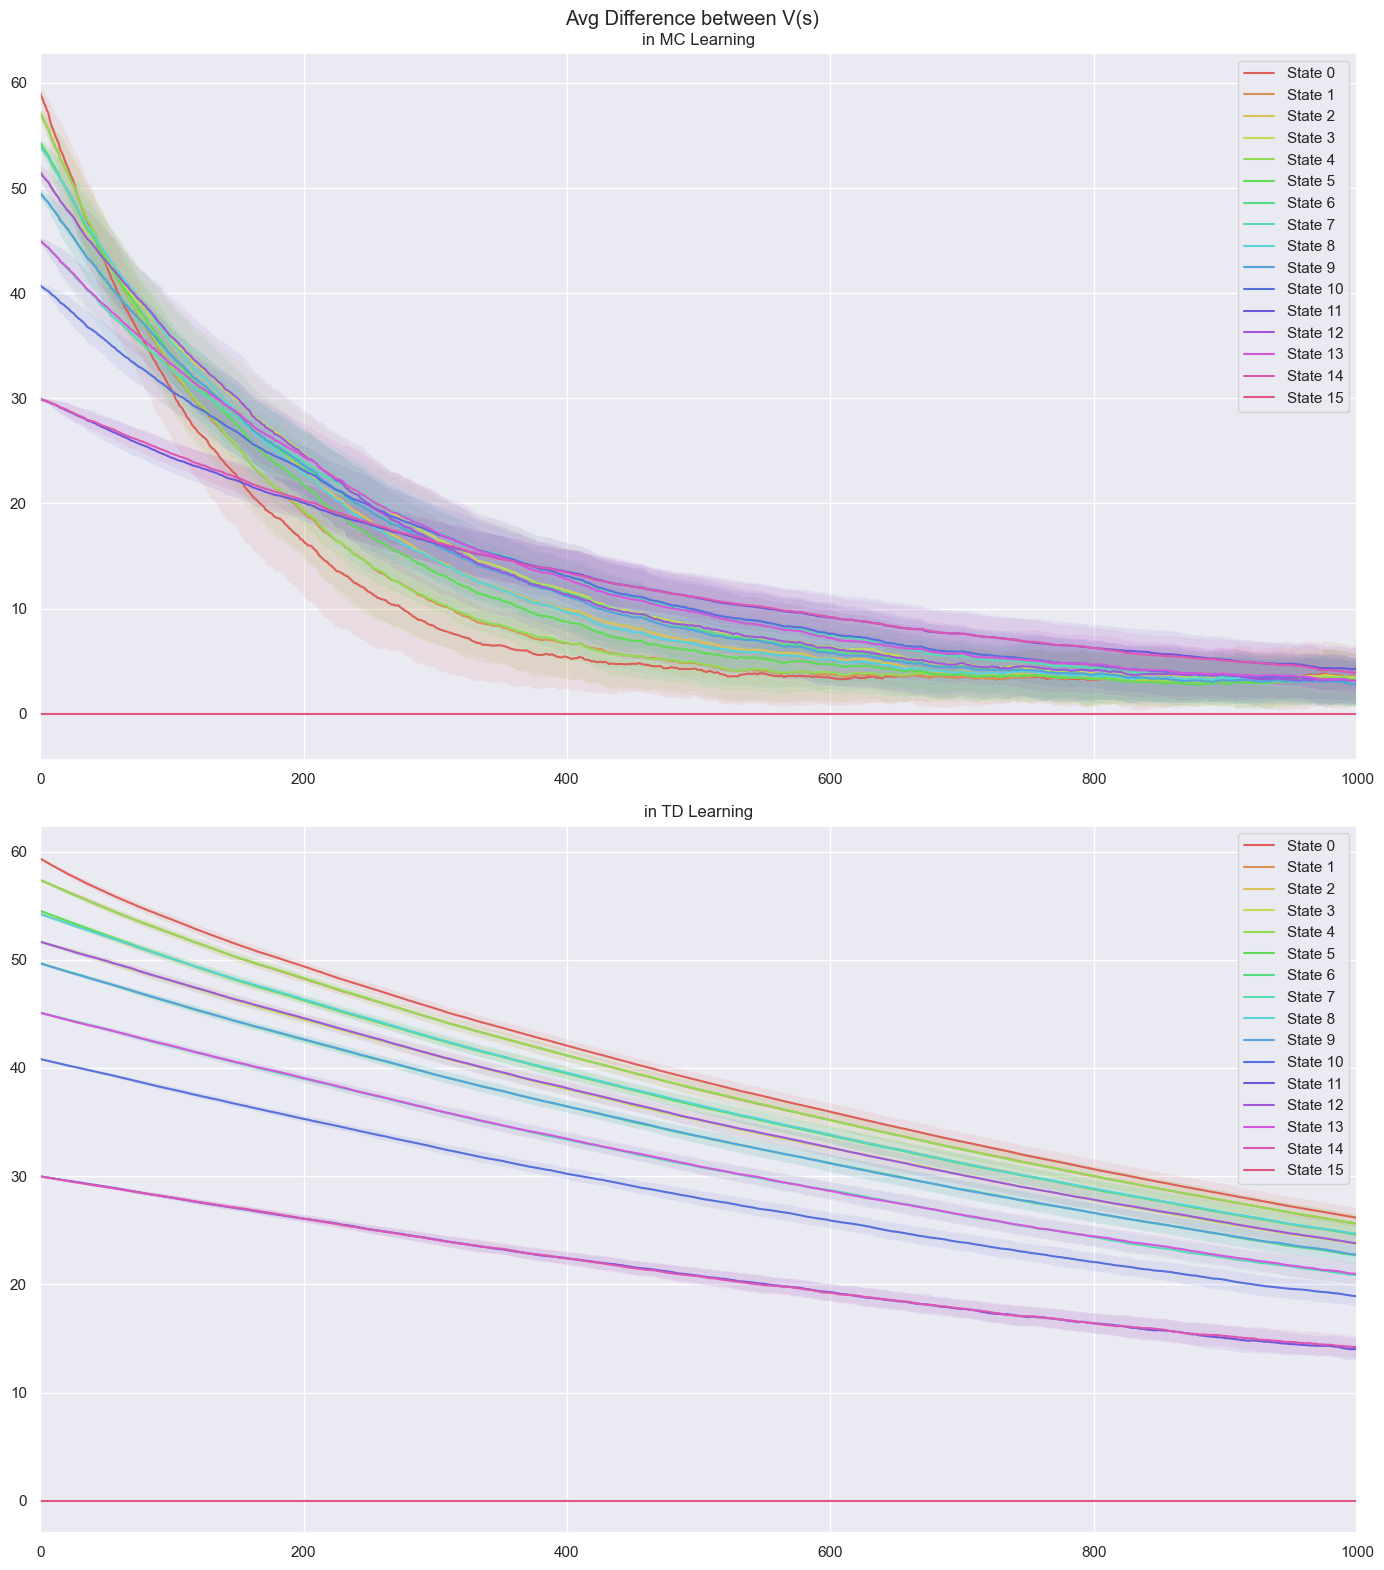

In [198]:
rainbow_like_palette = sns.color_palette("hls", 16)
sns.set_palette(rainbow_like_palette)

plt.figure(figsize=(14, 16))
plt.subplot(2, 1, 1)
plt.title("in MC Learning")
plt.xlim(0, 1000)
for i in range(16):
    plt.plot(MC_column_avg[i], label=f'State {i}')
    up = MC_column_avg[i] + MC_column_std[i]
    low = MC_column_avg[i] - MC_column_std[i]
    plt.fill_between(range(len(up)), low, up, alpha=0.1)
plt.legend()

plt.subplot(2, 1, 2)
plt.title("in TD Learning")
plt.xlim(0, 1000)
for i in range(16):
    plt.plot(TD_column_avg[i], label=f'State {i}')
    up = TD_column_avg[i] + TD_column_std[i]
    low = TD_column_avg[i] - TD_column_std[i]
    plt.fill_between(range(len(up)), low, up, alpha=0.1)
plt.legend()

plt.suptitle('Avg Difference between V(s)')
plt.tight_layout()

plt.show()